#### Time Series Analysis and Forecasting

- characteristics of the response variable concerning time as the independent variable
- we could predict the future using AR, MA, ARMA, and ARIMA models
- record data points at consistent intervals
- what factors affect a certain variable(s) at different points in time

#### Significance of Time Series
1. Analyzing the historical dataset and its patterns
2. Understanding and matching the current situation with patterns derived from the previous stage.
3. Understanding the factor or factors influencing certain variable(s) in different periods.

#### Application of time series
1. Forecasting: Predicting any value for the future.
2. Segmentation: Grouping similar items together.
3. Classification: Classifying a set of items into given classes.
4. Descriptive analysis: Analysis of a given dataset to find out what is there in it.
5. Intervention analysis: Effect of changing a given variable on the outcome.

#### Components of Time Series Analysis

- Trend: In which there is no fixed interval and any divergence within the given dataset is a continuous timeline. The trend would be Negative or Positive or Null Trend
- Seasonality: In which regular or fixed interval shifts within the dataset in a continuous timeline. Would be bell curve or saw tooth
- Cyclical: In which there is no fixed interval, uncertainty in movement and its pattern
- Irregularity: Unexpected situations/events/scenarios and spikes in a short time span.

#### Assumptions
- “stationary,” which means that the origin of time does not affect the properties of the process under the statistical factor.
> Stationary: A dataset should follow the below thumb rules without having Trend, Seasonality, Cyclical, and Irregularity components of the time series.
    >> 
        - The mean value of them should be completely constant in the data during the analysis.
        - The variance should be constant with respect to the time-frame
        - Covariance measures the relationship between two variables.
> Non- Stationary: If either the mean-variance or covariance is changing with respect to time, the dataset is called non-stationary.

- Methods to check stationarity
> Augmented Dickey-Fuller (ADF) Test or Unit Root Test
    >> The ADF test is the most popular statistical test. It is done with the following assumptions:
        - Null Hypothesis (H0): Series is non-stationary
        - Alternate Hypothesis (HA): Series is stationary
        - p-value >0.05 Fail to reject (H0)
        - p-value <= 0.05 Accept (H1)

> Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test ??
    >> These tests are used for testing a NULL Hypothesis (HO) that will perceive the time series as stationary around a deterministic trend against the alternative of a unit root. Since TSA is looking for       Stationary Data for its further analysis, we have to ensure that the dataset is stationary.

- Converting Non-Stationary Into Stationary - Three methods
> Detrending
    >> It involves removing the trend effects from the given dataset and showing only the differences in values from the trend. It always allows cyclical patterns to be identified.
> Differencing
    >> This is a simple transformation of the series into a new time series, which we use to remove the series dependence on time and stabilize the mean of the time series, so trend and seasonality are reduced during this transformation.
    - Yt= Yt – Yt-1
    - Yt=Value with time
> Transformation
    >> This includes three different methods they are Power Transform, Square Root, and Log Transfer. The most commonly used one is Log Transfer.
    - Log transfer
    - Power transform
    - Square root


#### Limitations
- Models mostly work on Uni-variate data.
- The data points must be linear in their relationship?? I dont understand what this means
- Data transformations are mandatory, so they are a little expensive.
- Similar to other models, the missing values are not supported by TSA

#### Steps to analyze time series
1. Collecting the data and cleaning it
2. Preparing Visualization with respect to time vs key feature
3. Observing the stationarity of the series
4. Developing charts to understand its nature.
5. Model building – AR, MA, ARMA and ARIMA
6. Extracting insights from prediction

#### Moving Average Methodology

1. The Moving Average (MA) (or) Rolling Mean: The value of MA is calculated by taking average data of the time-series within k periods
    - Simple Moving Average (SMA): The Simple Moving Average (SMA) calculates the unweighted mean of the previous M or N points. We prefer selecting sliding window data points based on the amount of smoothing, as increasing the value of M or N improves smoothing but reduces accuracy.
    - Cumulative Moving Average (CMA) - 
    - Exponential Moving Average (EMA)

##### Importing required packages

In [20]:
#Importing required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

#### Reading in the data

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [4]:
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [5]:
print("Min date : ", min(date_time))
print("Max date : ", max(date_time))
df.head()

Min date :  2009-01-01 01:00:00
Max date :  2016-12-31 23:10:00


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [6]:
df_temp = pd.to_numeric(df['T (degC)'])
df_temp.index = date_time
df_temp = pd.DataFrame(df_temp)

<AxesSubplot:xlabel='Date Time'>

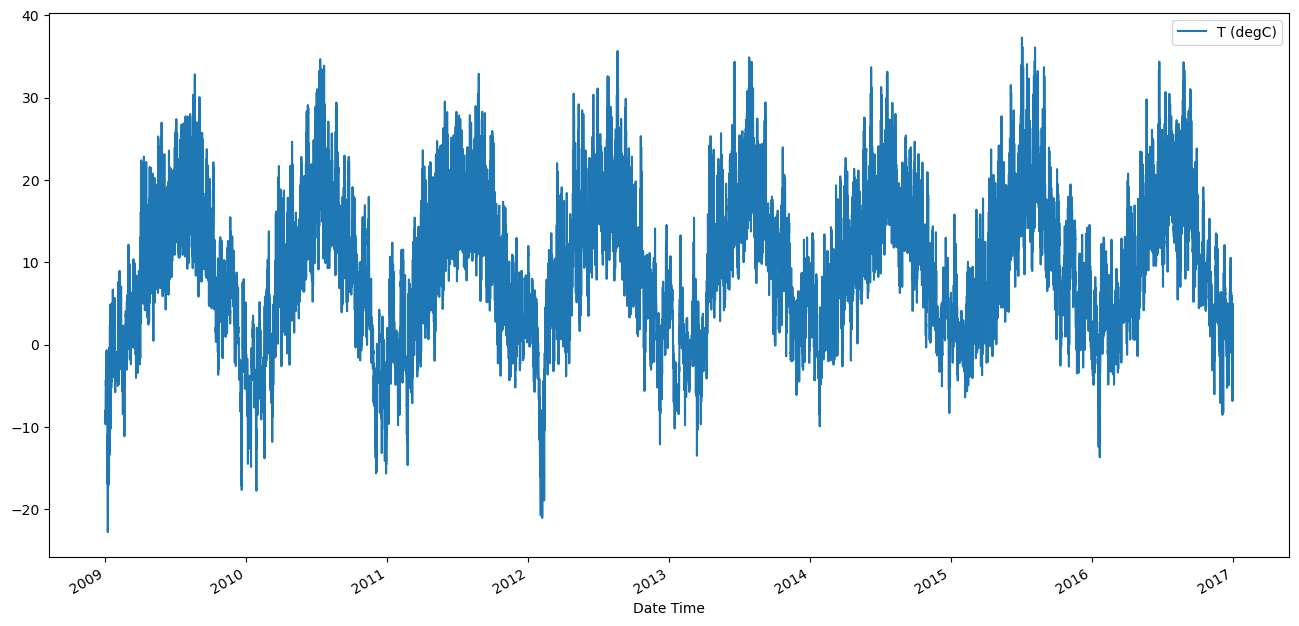

In [7]:
df_temp.plot()
#.set_index('Any', inplace=True)

In [17]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [18]:
adfuller(df['T (degC)'])

(-8.563580741044168,
 8.564826672532041e-14,
 62,
 70028,
 {'1%': -3.4304433846421474,
  '5%': -2.861581274354111,
  '10%': -2.566791968928322},
 153621.76794793358)

In [19]:
check_stationarity(df['T (degC)'])

ADF Statistic: -8.563581
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


##### Simple Moving Average (SMA):

In [76]:
# SMA over a period of 10 and 5 days 
df_temp['SMA_10'] = df_temp['T (degC)'].rolling(240, min_periods=1).mean()
df_temp['SMA_05'] = df_temp['T (degC)'].rolling(120, min_periods=1).mean()

Text(0, 0.5, 'Temperature [°C]')

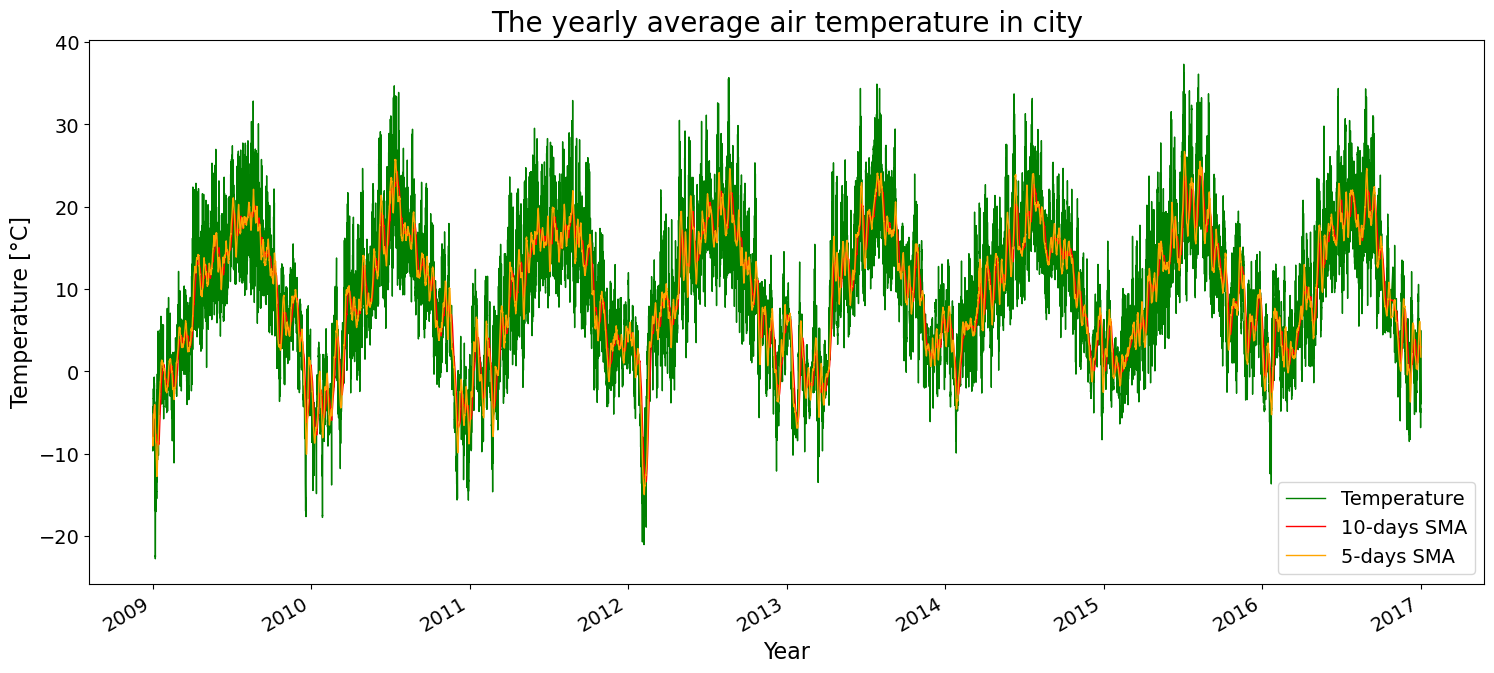

In [80]:
# Grean = Avg Air Temp, RED = 10 yrs, ORANG colors for the line plot
colors = ['green', 'red', 'orange']
# Line plot 
df_temp.plot(color=colors, linewidth=1, figsize=(18,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Temperature', '10-days SMA', '5-days SMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

##### Cumulative Moving Average (CMA)

Text(0, 0.5, 'Temperature [°C]')

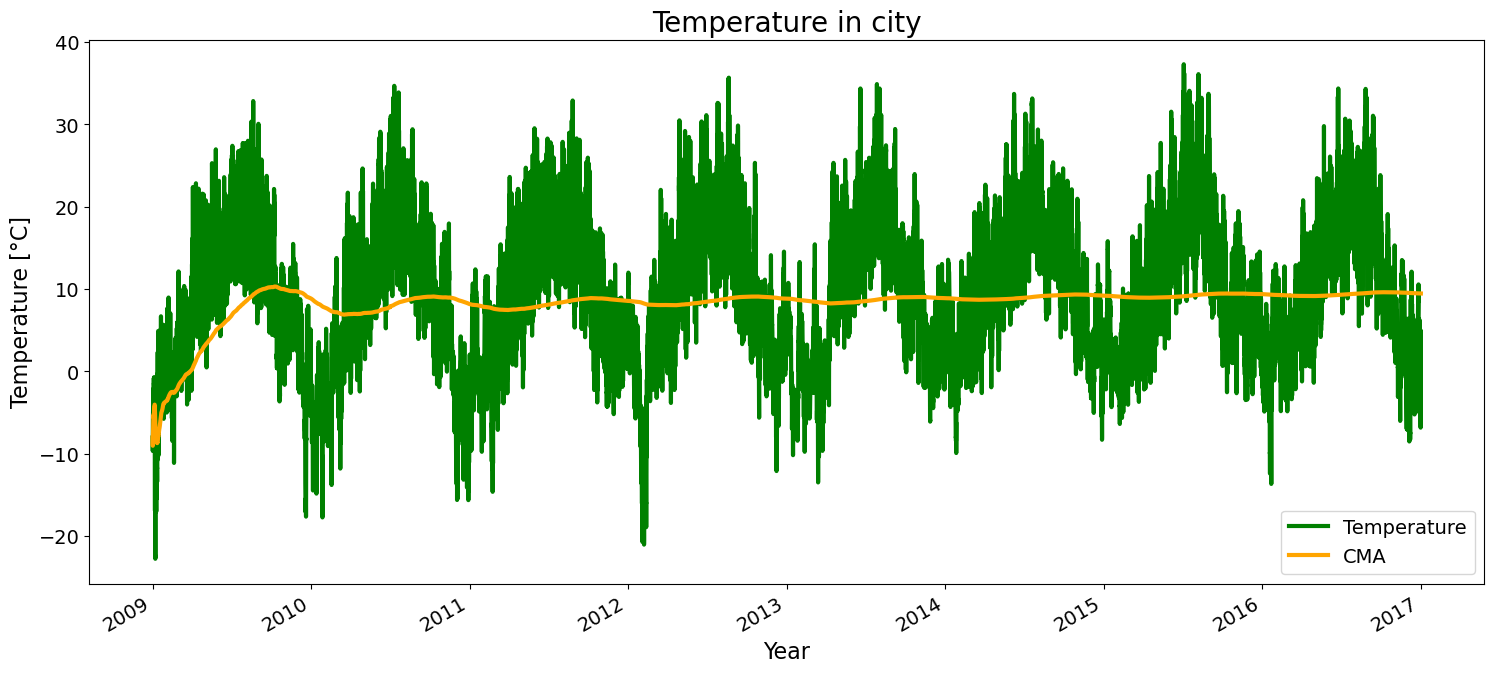

In [83]:
# CMA Air temperature
df_temp['CMA'] = df_temp['T (degC)'].expanding().mean()

# green -Avg Air Temp and Orange -CMA
colors = ['green', 'orange']
# line plot
df_temp[['T (degC)', 'CMA']].plot(color=colors, linewidth=3, figsize=(18,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Temperature', 'CMA'], fontsize=14)
plt.title('Temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

#### Exponential Moving Average (EMA)

Text(0, 0.5, 'Temperature [°C]')

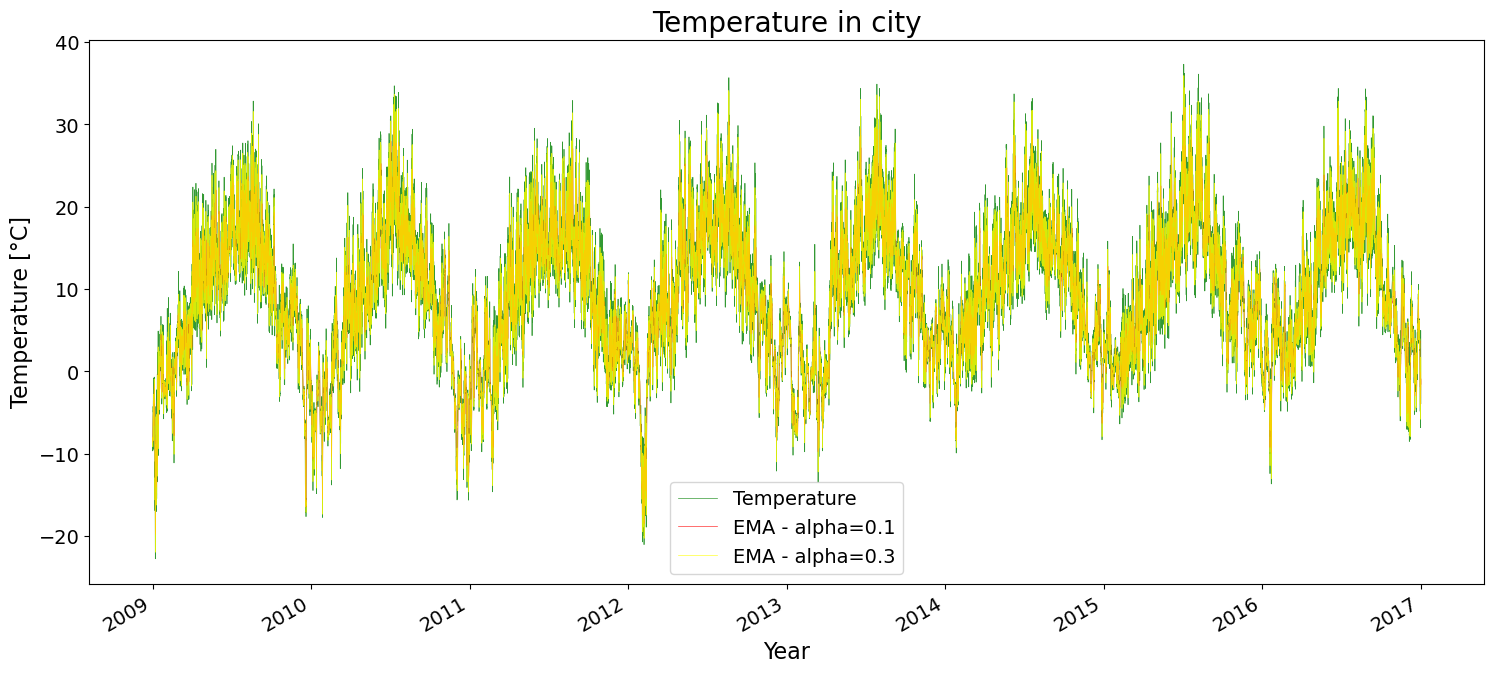

In [88]:
# EMA Air Temperature
# Let's smoothing factor - 0.1
df_temp['EMA_0.1'] = df_temp['T (degC)'].ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df_temp['EMA_0.3'] = df_temp['T (degC)'].ewm(alpha=0.3, adjust=False).mean()

# green - Avg Air Temp, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'yellow']
df_temp[['T (degC)', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=0.5, figsize=(18,8), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Temperature', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('Temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

#### Autoregressive–Moving-Average (ARMA) models with [p, d, and q].
 - P==> autoregressive lags
 - d==> difference in the order
 - q== moving average lags



- Auto-Correlation Function (ACF) - An ACF measures and plots the average correlation between data points in time series and previous values of the series measured for different lag lengths.
i.e. y=m1x1+c , y=m2x2+c m1 and m2 are Auto-correlations x1 and x2 are lags of same time series
- Partial Auto-Correlation Function (PACF) - A PACF is similar to an ACF except that each partial correlation controls for any correlation between observations of a shorter lag length
i.e. y=m1x1 + m2x2 + c here: m2 is adjusted after m1 is calculated

- The value for an ACF and a PACF at the first lag are the same because both measure the correlation between data points at time t with data points at time t-1. However, at the second lag, the ACF measures the correlation between data points at time t with data points at time t-2, while the PACF measures the same correlation but after controlling for the correlation between data points at time t with those at time t-1.


    |ACF|PACF|Model
    |-----------|-----------|-----------|
    Plot declines gradually | Plot drops instantly | Auto Regressive model
    Plot drops instantly | Plot declines gradually | Moving Average model
    Plot decline gradually | Plot Decline gradually | ARMA
    Plot drop instantly | Plot drop instantly | You wouldn’t perform any model

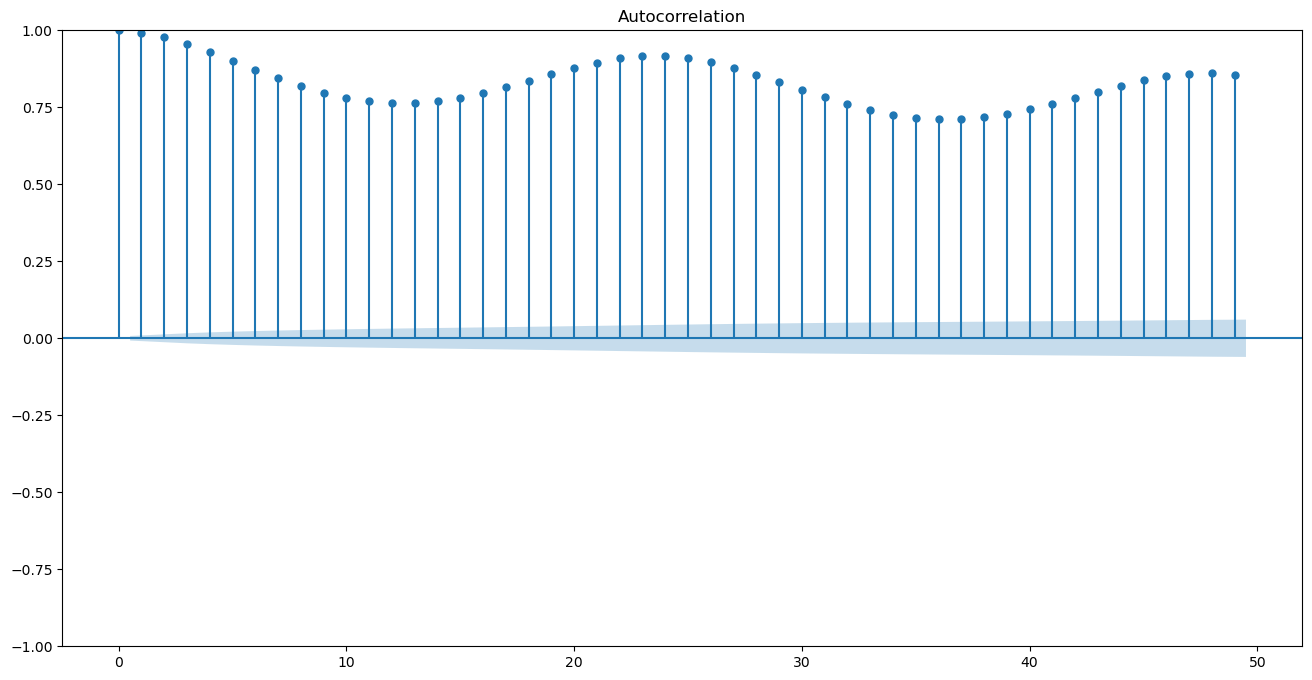

In [8]:
plot_acf(df_temp['T (degC)'])
plt.show()

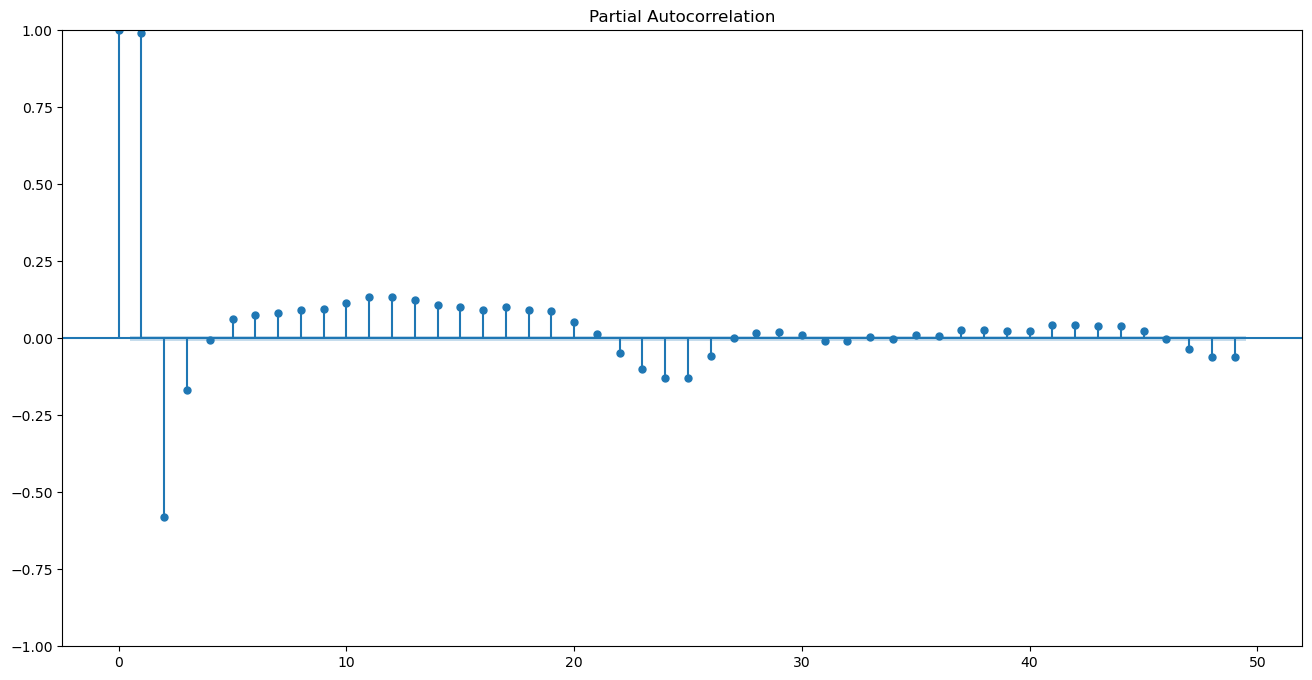

In [12]:

plot_pacf(df_temp['T (degC)'])
plt.show()

#### Auto-Regressive Model

An AR is a Linear Regression model that uses lagged variables as input. 

1. Creating the model AutoReg()
2. Call fit() to train it on our dataset.
3. Returns an AutoRegResults object.
4. Once fit, make a prediction by calling the predict () function
The equation for the AR model (Let’s compare Y=mX+c)
Yt =C+b1 Yt-1+ b2 Yt-2+……+ bp Yt-p+ Ert

Key Parameters:

 - p=past values
 - Yt=Function of different past values
 - Ert=errors in time
 - C=intercept

#### Questions

1. How do you check the correlation between two time series. When one goes up does the other go up?
    > Just like the normal correlation
2. What is p value and null and alternate hypothesis. How is it decided in general and for the stationary tests
3. Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test ??


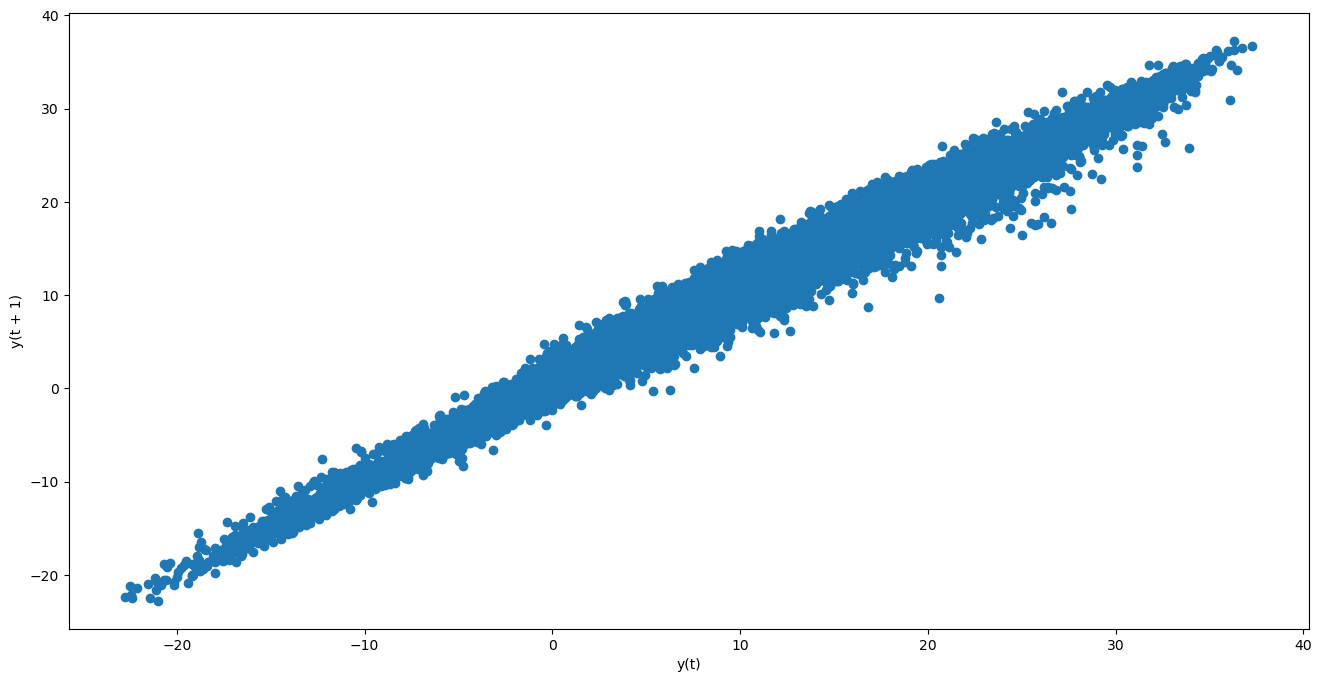

In [21]:

lag_plot(df_temp['T (degC)'])
plt.show()

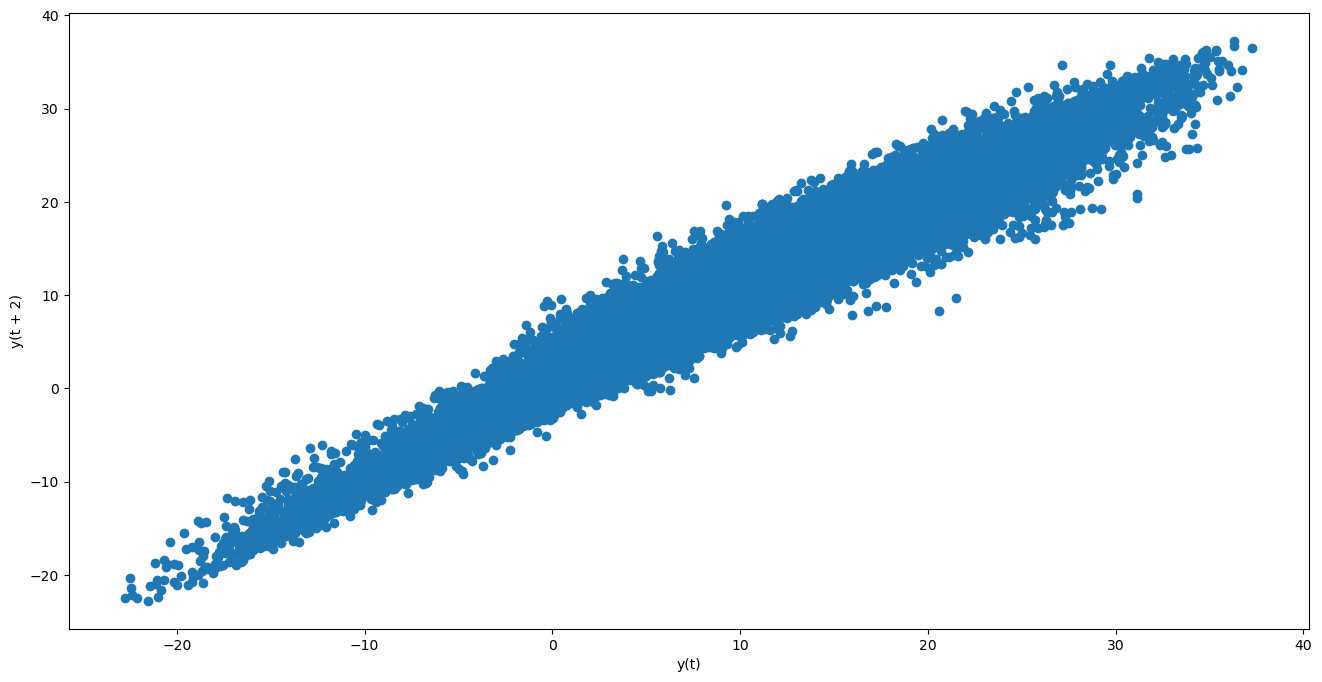

In [28]:
lag_plot(df_temp['T (degC)'], lag=2)
plt.show()

#### Implementation of Auto-Regressive Model

In [29]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:
# split dataset for test and training
test = df_temp[df_temp.index >= '2015-01-01']['T (degC)']
train = df_temp[df_temp.index < '2015-01-01']['T (degC)']

In [128]:
model = AutoReg(train, lags=[1,2,3,4,10,11,12,24], trend='c', seasonal=True, period=24)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Coefficients: const          -0.153489
s(2,24)        -0.006497
s(3,24)        -0.045503
s(4,24)        -0.069254
s(5,24)         0.053044
s(6,24)         0.220595
s(7,24)         0.396648
s(8,24)         0.594364
s(9,24)         0.603753
s(10,24)        0.564057
s(11,24)        0.440392
s(12,24)        0.360427
s(13,24)        0.350230
s(14,24)        0.253958
s(15,24)        0.244861
s(16,24)        0.022198
s(17,24)        0.069920
s(18,24)        0.034622
s(19,24)       -0.016226
s(20,24)        0.096395
s(21,24)        0.130954
s(22,24)        0.115168
s(23,24)        0.094474
s(24,24)        0.039150
T (degC).L1     1.328366
T (degC).L2    -0.235475
T (degC).L3    -0.093591
T (degC).L4    -0.049129
T (degC).L10   -0.043057
T (degC).L11   -0.031648
T (degC).L12    0.097473
T (degC).L24    0.023165
dtype: float64


In [129]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:435: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [130]:
print("predictions : ",len(predictions))
print("test : ",len(test))

predictions :  17470
test :  17470


In [131]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i:i+1,], test[i:i+1,]))

predicted=2.387720, expected=2.060000
predicted=2.602818, expected=2.220000
predicted=2.570668, expected=2.040000
predicted=2.466768, expected=1.790000
predicted=2.248128, expected=2.120000
predicted=1.945806, expected=2.460000
predicted=1.739050, expected=1.930000
predicted=1.584990, expected=1.790000
predicted=1.443385, expected=1.750000
predicted=1.287088, expected=1.450000
predicted=1.082802, expected=1.490000
predicted=0.854613, expected=2.480000
predicted=0.637153, expected=4.760000
predicted=0.410942, expected=6.300000
predicted=0.169834, expected=6.120000
predicted=0.063016, expected=5.250000
predicted=0.171914, expected=4.000000
predicted=0.540723, expected=2.910000
predicted=1.218154, expected=2.410000
predicted=2.027885, expected=2.370000
predicted=2.861351, expected=2.460000
predicted=3.569529, expected=1.850000
predicted=4.121168, expected=1.760000
predicted=4.559143, expected=1.550000
predicted=4.808695, expected=1.770000
predicted=4.936706, expected=1.700000
predicted=4.

Test RMSE: 8.639


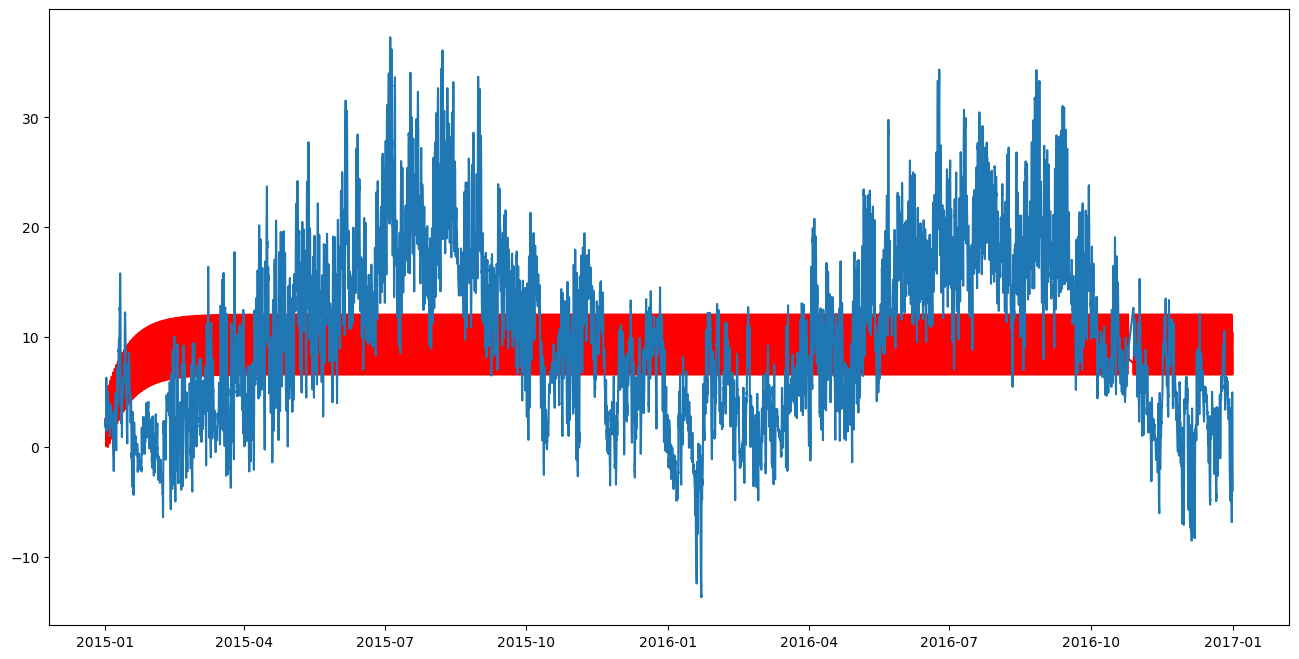

In [132]:

rmse = sqrt(mean_squared_error(test, predictions))
predictions.index = test.index
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(predictions, color='red')
plt.plot(test)
plt.show()

Text(0, 0.5, 'Weights')

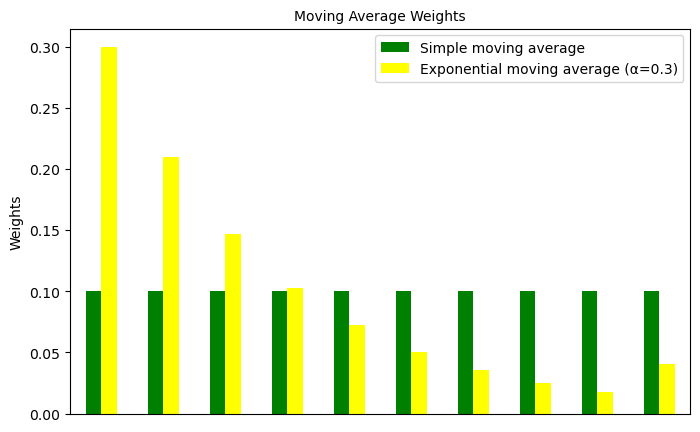

In [133]:
alpha= 0.3
n = 10
w_sma = np.repeat(1/n, n)
colors = ['green', 'yellow']
# weights - exponential moving average alpha=0.3 adjust=False
w_ema = [(1-alpha)**i if i==n-1 else alpha*(1-alpha)**i for i in range(n)]
pd.DataFrame({'w_sma': w_sma, 'w_ema': w_ema}).plot(color=colors, kind='bar', figsize=(8,5))
plt.xticks([])
plt.yticks(fontsize=10)
plt.legend(labels=['Simple moving average', 'Exponential moving average (α=0.3)'], fontsize=10)
# title and labels
plt.title('Moving Average Weights', fontsize=10)
plt.ylabel('Weights', fontsize=10)

In [136]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_temp['T (degC)'], order=(3, 0, 2)) 
results_ARIMA = model.fit()

results_ARIMA.summary()

c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tyagi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tyagi\anaconda3\lib\site-

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               T (degC)   No. Observations:                70091
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -85040.182
Date:                Tue, 24 Oct 2023   AIC                         170094.364
Time:                        09:36:21   BIC                         170158.467
Sample:                             0   HQIC                        170114.134
                              - 70091                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1346      0.248     36.888      0.000       8.649       9.620
ar.L1          0.9347      0.042     22.095      0.000       0.852       1.018
ar.L2          0.6361      0.075      8.505      0.000       0.490       0.783
ar.L3         -0.5892      0.033    -17.734      0.000      -0.654      -0.524
ma.L1          0.5446      0.043     12.805      0.000       0.461       0.628
ma.L2         -0.1772      0.014    -12.575      0.000      -0.205      -0.150
sigma2         0.6642      0.002    382.068      0.000       0.661       0.668
===================================================================================
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):            152301.87
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results_ARIMA.forecast(3)[0]

In [ ]:
array([16.47648941, 16.48621826, 16.49594711])